# Credit Risk Evaluator

In [67]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [68]:
# Import the data
lending = pd.read_csv('Resources/lending_data.csv')
lending.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

I believe the Logistic Regression model will perform better because we want to predict if the lender will be approved or not, that is a binary outcome

## Split the Data into Training and Testing Sets

In [69]:
# Split the data into X_train, X_test, y_train, y_test

y = lending['loan_status'].values
X = lending.drop('loan_status', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

Logistic Regression model 

In [70]:
# Train a Logistic Regression model and print the model score
#Create a logistic regression model
classifier = LogisticRegression(max_iter=10000)
classifier

LogisticRegression(max_iter=10000)

In [71]:
#Fit (train) our model by using the training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [72]:
#Validate the model by using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


In [73]:
#Create a Confusion Matrix
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[18663,   102],
       [   56,   563]], dtype=int64)

In [74]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9918489475856377


In [75]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



Random Forest Classifier model

In [76]:
# Train a Random Forest Classifier model and print the model score
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


In [79]:
#Create a Confusion Matrix
y_true = y_test
y_pred = clf.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[18665,   100],
       [   60,   559]], dtype=int64)

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.90      0.87       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



[1.29066792e-01 2.74137485e-01 1.74521675e-01 1.58682971e-01
 1.18902531e-01 8.06639163e-05 1.44607881e-01]


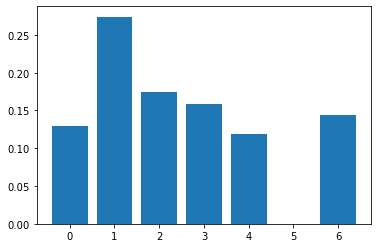

In [81]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

*Which model performed better? How does that compare to your prediction? Replace the text in this markdown cell with your answers to these questions.*

Both models performed similar, The Random Forest Classifier model had higher training score, but the linear regression had higher testing score just by <0.0001
